# Implementing Faster R-CNN with ResNet-50 backbone to detect objects in the COCO dataset.

In [1]:
%pip install torch torchvision
%pip install pillow matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 8.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 7.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 8.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 9.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [5]:
test_img = Image.open("../img/traffic.jpg")

In [6]:
import torchvision.transforms as transforms

#compase steps
transform = transforms.Compose([
    transforms.ToTensor(),
])

#tensor transformation process

test_img_tensor = transform(test_img)
test_img_tensor

tensor([[[0.6745, 0.6784, 0.7490,  ..., 0.1059, 0.1255, 0.1412],
         [0.6667, 0.6627, 0.7255,  ..., 0.1020, 0.1490, 0.1412],
         [0.6588, 0.6510, 0.6902,  ..., 0.1176, 0.1529, 0.1333],
         ...,
         [0.4353, 0.4510, 0.4549,  ..., 0.6745, 0.6314, 0.5333],
         [0.4510, 0.4667, 0.4431,  ..., 0.6157, 0.6039, 0.5529],
         [0.3882, 0.3843, 0.3843,  ..., 0.4392, 0.4627, 0.4431]],

        [[0.6471, 0.6510, 0.7216,  ..., 0.0471, 0.0667, 0.0824],
         [0.6392, 0.6353, 0.6980,  ..., 0.0431, 0.0902, 0.0824],
         [0.6314, 0.6235, 0.6627,  ..., 0.0588, 0.0941, 0.0745],
         ...,
         [0.4588, 0.4745, 0.4588,  ..., 0.7020, 0.6549, 0.5686],
         [0.4745, 0.4902, 0.4471,  ..., 0.6510, 0.6392, 0.5961],
         [0.4078, 0.4039, 0.3882,  ..., 0.4745, 0.5059, 0.4902]],

        [[0.5725, 0.5765, 0.6510,  ..., 0.0667, 0.0863, 0.1020],
         [0.5647, 0.5608, 0.6275,  ..., 0.0627, 0.1098, 0.1020],
         [0.5608, 0.5529, 0.6000,  ..., 0.0784, 0.1137, 0.

In [7]:
#Increasing tensor dimensions

test_img_tensor = test_img_tensor.unsqueeze(dim=0)
test_img_tensor.shape

#batch steps
images = [test_img_tensor]

In [8]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

preds = model(test_img_tensor) # Use model instead of object_detection_model
print(preds)

/Users/a2024/miniforge3/envs/academics/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/a2024/miniforge3/envs/academics/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /Users/a2024/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100.0%


[{'boxes': tensor([[ 510.7016,  546.0557,  787.8421,  774.9723],
        [ 157.0538,  553.6703,  457.0887,  774.3778],
        [ 712.7628,  300.6111,  853.6613,  433.3136],
        [ 889.9667,  355.2427, 1037.6063,  501.5330],
        [ 354.0460,  410.6756,  546.6842,  576.6790],
        [ 601.7465,  341.3148,  803.0220,  522.2147],
        [ 564.4459,  258.4195,  707.4224,  379.1129],
        [  69.4158,  213.6197,  221.2619,  310.2731],
        [ 486.7574,  320.8705,  550.6994,  402.5450],
        [ 409.8395,  222.7816,  595.9178,  332.7925],
        [ 232.0482,  395.5995,  284.9675,  488.7918],
        [ 852.4855,  240.3760,  984.6880,  353.1662],
        [ 571.8452,  584.4956,  630.5585,  635.5043],
        [  37.8705,  257.6482,   88.4542,  340.8536],
        [ 242.1518,  594.9141,  298.1078,  645.6824],
        [ 614.1422,  152.7752,  707.5258,  242.6809],
        [1172.2162,  196.3232, 1202.2897,  280.5150],
        [ 643.0134,  199.4187,  746.9883,  299.9769],
        [ 496.895

In [9]:

COCO_INSTANCE_CATEGORY_NAMES = [
    '','person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

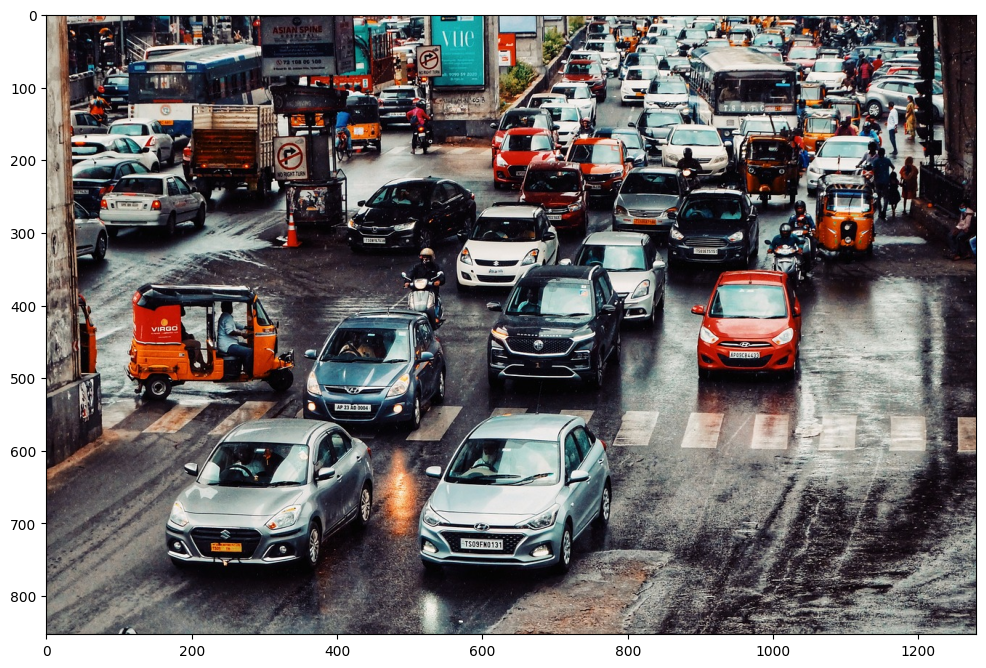

In [10]:
img = test_img_tensor.squeeze().detach().cpu().numpy()

img = img.transpose(1, 2, 0)
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(img)

Note: you may need to restart the kernel to use updated packages.


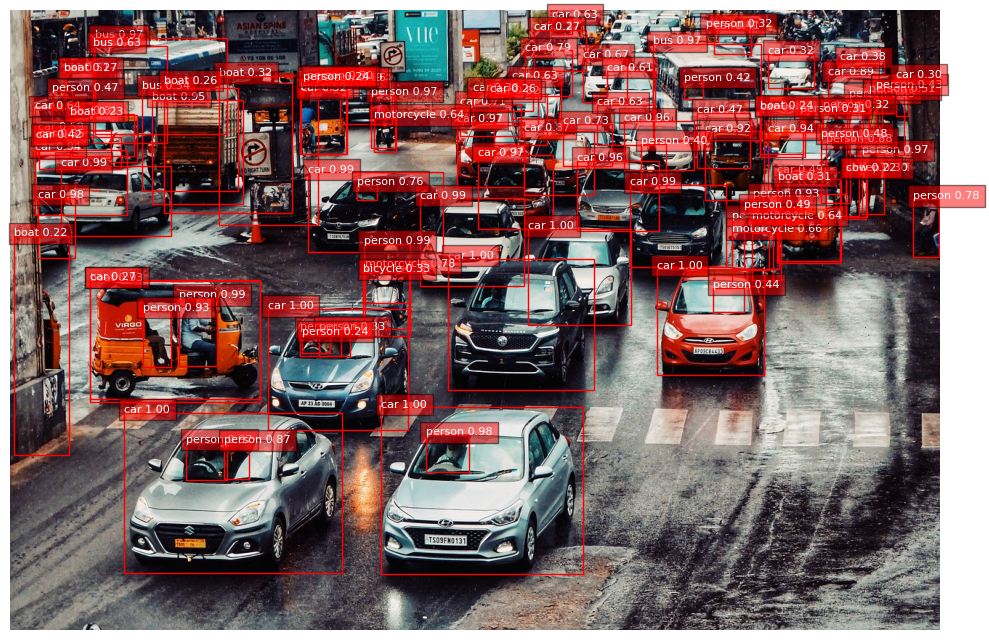

In [11]:
%pip install Pillow
from PIL import Image

# ... your existing code ...

img = test_img_tensor.squeeze().detach().cpu().numpy()
img = img.transpose(1, 2, 0)

# Resize the image
max_size = 65535
if img.shape[0] > max_size or img.shape[1] > max_size:
    if img.shape[0] > img.shape[1]:
        new_width = max_size
        new_height = int(img.shape[1] * max_size / img.shape[0])
    else:
        new_height = max_size
        new_width = int(img.shape[0] * max_size / img.shape[1])
    img = Image.fromarray((img * 255).astype('uint8')).resize((new_width, new_height))
    img = np.array(img) / 255.0

fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(img)

# ... your existing code ...




for box, label, score in zip(preds[0]['boxes'].detach().cpu().numpy(),
                             preds[0]['labels'].detach().cpu().numpy(),
                             preds[0]['scores'].detach().cpu().numpy()):
    x1, y1, x2, y2 = box
    label_name = COCO_INSTANCE_CATEGORY_NAMES[label]
    ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none'))
    plt.text(x1, y1, f'{label_name} {score:.2f}', color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')
plt.show()